<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Employee data)

The dataset contains information about employees. The aim is to find which employees might undergo attrition.<br> Attribute information: 

**Age:** Age of the employee 

**BusinessTravel:** How much travel is involved in the job for the employee:No Travel, Travel Frequently, Tavel Rarely

**Department:** Department of the employee: Human Resources, Reserach & Development, Sales

**Commute:** Number of miles of daily commute for the employee

**Education:** Employee education field: Human Resources, Life Sciences, Marketing, Medical Sciences, Technical, Others

**EnvironmentSatisfaction:** Satisfaction of employee with office environment

**Gender:** Employee gender

**JobInvolvement:** Job involvement rating

**JobLevel:**  Job level for employee designation

**JobSatisfaction:** Employee job satisfaction rating

**MonthlyIncome:** Employee monthly salary

**OverTime:** Has the employee been open to working overtime: Yes or No

**PercentSalaryHike:** Percent increase in salary

**PerformanceRating:** Overall employee performance rating

**YearsAtCompany:** Number of years the employee has worked with the company

**Attrition:** Employee leaving the company: Yes or No

## Table of Content

1. **[Decision tree](#dtree)**
2. **[Random forest](#rf)**

**Import the required libraries**

In [1]:
# type your code here
# import 'Pandas' 
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import roc_auc_score,roc_curve

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss

# import function to perform feature selection
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import StackingClassifier

#### Load the csv file

In [2]:
# type your code here
df_emp=pd.read_csv('emp_attrition.csv')
df_emp.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,33,Yes,Travel_Frequently,Research & Development,3,Life Sciences,1,Male,3,1,Research Scientist,1,3348,1,Yes,11,3,10
1,32,Yes,Travel_Rarely,Sales,4,Medical,4,Male,1,3,Sales Executive,4,10400,1,No,11,3,14
2,40,Yes,Travel_Rarely,Research & Development,9,Life Sciences,4,Male,3,1,Laboratory Technician,1,2018,3,No,14,3,5
3,42,No,Travel_Rarely,Research & Development,7,Medical,2,Female,4,2,Research Scientist,2,2372,6,Yes,16,3,1
4,43,No,Travel_Frequently,Research & Development,27,Life Sciences,3,Female,3,3,Manufacturing Director,1,10820,8,No,11,3,8


In [3]:
df_emp.dtypes

Age                         int64
Attrition                  object
BusinessTravel             object
Department                 object
DistanceFromHome            int64
EducationField             object
EnvironmentSatisfaction     int64
Gender                     object
JobInvolvement              int64
JobLevel                    int64
JobRole                    object
JobSatisfaction             int64
MonthlyIncome               int64
NumCompaniesWorked          int64
OverTime                   object
PercentSalaryHike           int64
PerformanceRating           int64
YearsAtCompany              int64
dtype: object

In [4]:
#we need to do type casting for some attributes
df_emp.EnvironmentSatisfaction=df_emp.EnvironmentSatisfaction.astype('object')
df_emp.JobInvolvement=df_emp.JobInvolvement.astype('object')
df_emp.JobLevel=df_emp.JobLevel.astype('object')
df_emp.JobSatisfaction=df_emp.JobSatisfaction.astype('object')

In [5]:
df_emp.PerformanceRating.value_counts()

3    1580
Name: PerformanceRating, dtype: int64

In [6]:
df_emp.dtypes

Age                         int64
Attrition                  object
BusinessTravel             object
Department                 object
DistanceFromHome            int64
EducationField             object
EnvironmentSatisfaction    object
Gender                     object
JobInvolvement             object
JobLevel                   object
JobRole                    object
JobSatisfaction            object
MonthlyIncome               int64
NumCompaniesWorked          int64
OverTime                   object
PercentSalaryHike           int64
PerformanceRating           int64
YearsAtCompany              int64
dtype: object

In [7]:
df_emp.Attrition = df_emp.Attrition.replace({'Yes':1,'No':0})

In [8]:
encode = pd.get_dummies(df_emp,drop_first=True)
encode.head()

,Age,Attrition,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,Gender_Male,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_2,JobLevel_3,JobLevel_4,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,OverTime_Yes
0,33,1,3,3348,1,11,3,10,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,32,1,4,10400,1,11,3,14,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,40,1,9,2018,3,14,3,5,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,42,0,7,2372,6,16,3,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1
4,43,0,27,10820,8,11,3,8,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


### Let's begin with some hands-on practice exercises

<a id="dtree"> </a>
## 1. Decision tree

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Write a code to detect the outliers in the dataset. Remove the outliers using IQR method, if present.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
# type your code here
df_emp.shape

(1580, 18)

In [10]:
Q1=df_emp.quantile(0.25)
Q3=df_emp.quantile(0.75)
IQR=Q3-Q1
df_emp = df_emp[~((df_emp<(Q1-1.5*IQR)) | (df_emp>(Q3+1.5*IQR))).any(axis=1)]


In [11]:
df_emp.shape

(1488, 18)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a model to predict whether or not an employee will leave the company based on employee's environment satisfaction and monthly income. Calculate the accuracy for the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
# type your code here
encode.head()

,Age,Attrition,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,Gender_Male,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_2,JobLevel_3,JobLevel_4,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,OverTime_Yes
0,33,1,3,3348,1,11,3,10,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,32,1,4,10400,1,11,3,14,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,40,1,9,2018,3,14,3,5,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,42,0,7,2372,6,16,3,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1
4,43,0,27,10820,8,11,3,8,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [13]:
x = encode[['EnvironmentSatisfaction_2','EnvironmentSatisfaction_3','EnvironmentSatisfaction_4','MonthlyIncome']]
y = encode.Attrition
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)
dt=DecisionTreeClassifier()
model = dt.fit(x_train,y_train)
ypred = model.predict(x_test)
print('accuracy of the model is',round(accuracy_score(y_test,ypred),2))

accuracy of the model is 0.91


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Build a full model to predict if an employee will leave the company. Find three features that impact the model prediction the most.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
# type your code here
x=encode.drop('Attrition',axis=1)
y=encode.Attrition
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)
dt = DecisionTreeClassifier()
model = dt.fit(x_train,y_train)
ypred = model.predict(x_test)
res =pd.DataFrame({'Columns':x.columns,'Importance' : model.feature_importances_})
res.sort_values(by='Importance',ascending=False).head(3)

,Columns,Importance
2,MonthlyIncome,0.201544
0,Age,0.166839
6,YearsAtCompany,0.088867


In [15]:
#the are the three important feature consider the predicting attrition are below  

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4.  Find the area under the receiver operating characteristic curve for full model built in question 3. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
# type your code here
x=encode.drop('Attrition',axis=1)
y=encode.Attrition
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)
dt = DecisionTreeClassifier()
model = dt.fit(x_train,y_train)
ypred = model.predict(x_test)
y_test_prob=model.predict_proba(x_test)[:,1]
print('The AUC-ROC score : ',roc_auc_score(y_test,ypred))

The AUC-ROC score :  0.9112929490311024


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Plot a confusion matrix for the full model built in Q3.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

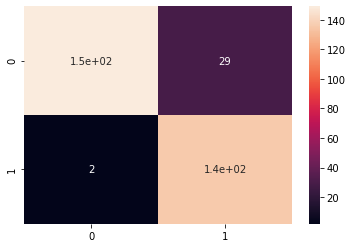

In [17]:
# type your code here
sns.heatmap(confusion_matrix(y_test,ypred),annot=True)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Calculate the specificity, sensitivity, % of misclassified and correctly classified observations. What can you say about the model by looking at the sensitivity and specificity values? Is this a good model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
# type your code here
cm = confusion_matrix(y_test,ypred)
TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
specifity = TN/(TN+FP)
sensitivity = TP/(TP+FN)
correctly_classified = (TN+TP)/(TN+TP+FP+FN)
mis_classified = (FN+FP)/(TN+TP+FP+FN)
print('specifity : ',round(specifity,2))
print('sensitivity :',round(sensitivity,2))
print('% of correctly classified :',round(correctly_classified*100,2))
print('% of mis classified :',round(mis_classified*100,2))

specifity :  0.84
sensitivity : 0.99
% of correctly classified : 90.19
% of mis classified : 9.81


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build and plot a decision tree with maximum 5 terminal nodes.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

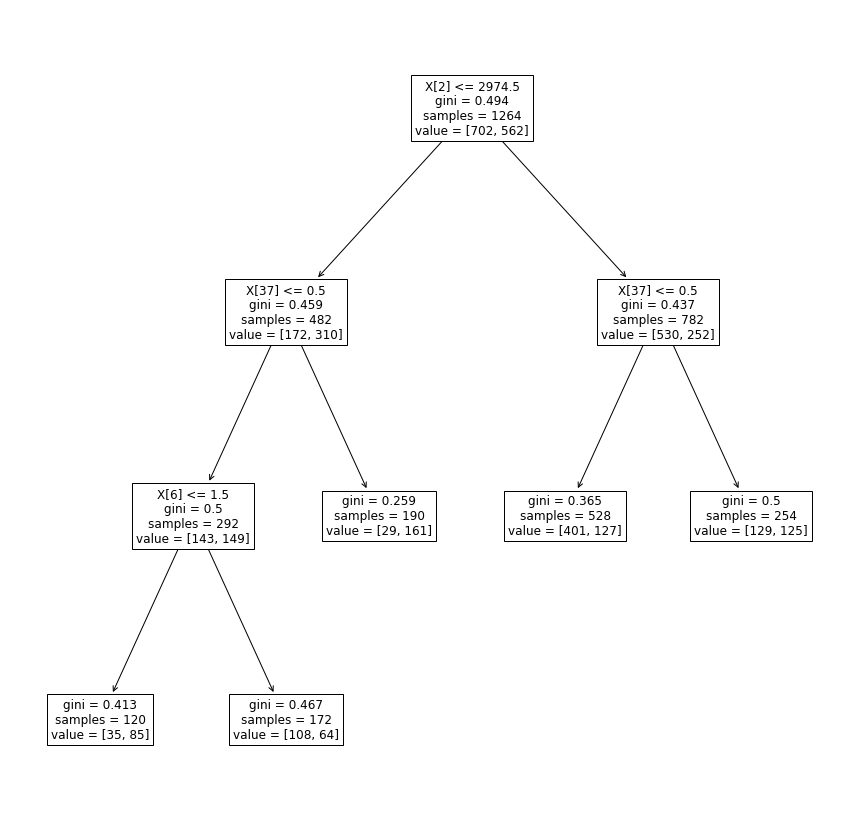

In [19]:
# type your code here
plt.rcParams['figure.figsize']=(15,15)
x=encode.drop('Attrition',axis=1)
y=encode.Attrition
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)
dt = DecisionTreeClassifier(max_leaf_nodes=5)
model = dt.fit(x_train,y_train)
ypred = model.predict(x_test)
tree.plot_tree(model,fontsize=12)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a Decision Tree model with the predefined parameters and find the average accuracy by performing the 10 fold cross validation.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
# type your code here
dt=DecisionTreeClassifier()
grid=cross_val_score(dt,x_train,y_train,scoring='accuracy',cv=10)
print('The average accuracy :',np.mean(grid))

The average accuracy : 0.8789276340457443


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. For a decision tree model, find the best value of hyperparameters "criterion", "max_depth", and "min_samples_split".</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the values as:
        
     criterion = ['entropy', 'gini'],
     max_depth = range(2, 10),
     min_samples_split = range(2,10)

In [21]:
# type your code here
params={'criterion' : ['entropy', 'gini'],
 'max_depth' :range(2, 10),
 'min_samples_split' :range(2,10)}
dt=DecisionTreeClassifier()
grid=GridSearchCV(dt,param_grid=params,cv=5,scoring='accuracy')
model=grid.fit(x_train,y_train)
model.best_params_

{'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 3}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>10. Build a decision tree model using the tuned hyperparameters, perform 10 fold cross validation and get the average ROC-AUC score.Find the bias and variance error.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
# type your code here
dt = DecisionTreeClassifier(criterion='gini',max_depth=9,min_samples_split=2)
model = dt.fit(x_train,y_train)
ypred = model.predict(x_test)
roc_auc = roc_auc_score(y_test,ypred)
scores = cross_val_score(dt,x_train,y_train,scoring='accuracy',cv=10)
bias = 1-np.mean(scores)
variance = np.std(scores)/np.mean(scores)
print('ROC_AUC score :',round(roc_auc,2))
print('BIAS error : ',round(bias,2)*100)
print('Variance error :',round(variance,2)*100)

ROC_AUC score : 0.88
BIAS error :  14.000000000000002
Variance error : 3.0


<a id="rf"> </a>
## 2. Random Forest

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Build a random forest full model to predict if an employee will leave the company or not and generate a classification report.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
# type your code here
rf=RandomForestClassifier()
model=rf.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('classification_report :')
print(classification_report(y_test,y_pred))

classification_report :
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       178
           1       0.93      0.99      0.96       138

    accuracy                           0.97       316
   macro avg       0.96      0.97      0.96       316
weighted avg       0.97      0.97      0.97       316



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. For a random forest model, find the best value of hyperparameters "n_estimators", "criterion", "max_depth", and "min_samples_split".</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

    criterion = ['entropy', 'gini'],
    n_estimators = [90, 100, 150, 200],
    max_depth = [10, 15, 20],
    min_samples_split = [2, 5, 8]

In [24]:
# type your code here
params={'criterion' :['entropy', 'gini'],
'n_estimators' :[90, 100, 150, 200],
'max_depth':[10, 15, 20],
'min_samples_split' :[2, 5, 8]}
rf=RandomForestClassifier()
grd=GridSearchCV(rf,param_grid=params,scoring='f1_weighted',cv=10)
model=grd.fit(x_train,y_train)
model.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_split': 2,
 'n_estimators': 150}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Build a random forest model using the tuned hyperparameters, perform 10 fold cross validation and get the average ROC-AUC score.Find the bias ans variance error.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
# type your code here
rf = RandomForestClassifier(criterion='entropy',n_estimators=90,max_depth=20,min_samples_split=2)
scores = cross_val_score(dt,x_train,y_train,scoring='roc_auc',cv=10)
print('The average ROC-AUC score is ',round(np.mean(scores),2))

The average ROC-AUC score is  0.89


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Using the tuned random forest model, find the features that impact the model prediction the most.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
# type your code here
r_f = RandomForestClassifier(criterion= 'entropy',
   max_depth= 20,
    min_samples_split= 2,
    n_estimators= 90)

model = r_f.fit(x_train,y_train)
y_pred = model.predict(x_test)

res = pd.DataFrame({'Col':x.columns,'Importance':model.feature_importances_})
res.sort_values('Importance',ascending=False).head(10)

,Col,Importance
2,MonthlyIncome,0.127216
0,Age,0.113059
6,YearsAtCompany,0.093165
1,DistanceFromHome,0.085532
4,PercentSalaryHike,0.063961
37,OverTime_Yes,0.058038
3,NumCompaniesWorked,0.056872
36,JobSatisfaction_4,0.023384
21,JobInvolvement_3,0.020927
7,BusinessTravel_Travel_Frequently,0.020770


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Build a random forest model using the top 10 most important features.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
# type your code here
list(res.sort_values('Importance',ascending=False).head(10)['Col'])

['MonthlyIncome',
 'Age',
 'YearsAtCompany',
 'DistanceFromHome',
 'PercentSalaryHike',
 'OverTime_Yes',
 'NumCompaniesWorked',
 'JobSatisfaction_4',
 'JobInvolvement_3',
 'BusinessTravel_Travel_Frequently']

In [30]:
x = encode[['MonthlyIncome','Age','YearsAtCompany','DistanceFromHome','PercentSalaryHike','NumCompaniesWorked','OverTime_Yes',
         'JobLevel_2','Gender_Male','JobSatisfaction_4']]
y=encode.Attrition
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)
r_f = RandomForestClassifier()
model = r_f.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:,1]
print('classification_report')
print(classification_report(y_test,y_pred))

classification_report
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       178
           1       0.89      0.99      0.94       138

    accuracy                           0.94       316
   macro avg       0.94      0.95      0.94       316
weighted avg       0.95      0.94      0.94       316



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Plot a confusion matrix and area under the receiver operating characteristic curve for the model built in question 19. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

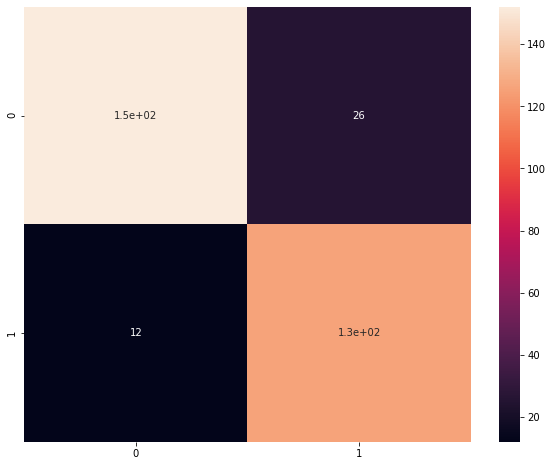

In [33]:
plt.rcParams['figure.figsize'] = (10,8)
sns.heatmap(confusion_matrix(y_test,ypred),annot=True)
plt.show()